## Purpose
This is introduction to machine learning and in this, we are going to look at how various things work

### Gist of this notebook
It contains three models:
1. Cat Identifier
2. Image Segmentation that identifies different segments within a given image
3. Feedback classifier
4. There is one more that I am not sure about

### Cat Identifier
Before we go into the code, let's think about how it would work. Broadly these are the three sets that we will follow:
1. We will take a pre-trained model
2. This pre-trained model is trained on a specific dataset of images
3. We will test this newly trained model

Let's go through them one by one:
Getting a pre-trained model. There are many pre-trained image recognition models that are available. The one that you want to choose is the one that has least footprint with desired accuracy.

Let's say that you have found the model that you want to train. The question comes, how do you train it:
1. Get the sample data that you want to train
2. Divide the data into training set and validation set
3. Training the model on the training set for a given number of iterations. These iterations are called epochs.
4. After each Epoch, the system would check the accuracy of the trained model on the validation set.
5. One way to define the number of iterations for training is to keep a close eye on the accuracy. We want to keep as many epochs that lead to improvement in accuracy.

In [1]:
# "Uqq" quitely install the latest version of the fastbook
! [ -e /content ] && pip install -Uqq fastbook
# Once it is installed, import it. With import, all its modules become accessible.
import fastbook
# If fastbook is imported, it would set up the whole environment for fastbook to operate properly.
fastbook.setup_book()

In [2]:
# Though above, we already imported the fastbook, with the following command, we are importing all its modules as well.
# By doing so, all its modules would become accessible
from fastbook import *

In [3]:
# With the following statement, we import all the modules within fastai.vision.all
from fastai.vision.all import *

# untar_data function downloads the the file or folder from the specified location and returns the path of the location
# where the given file or folder was downloaded.
# by doing /'images' with this given location, we concatanate these two strings and essentially form a string path to the images folder within
# the downloaded location
path = untar_data(URLs.PETS)/'images'

# The following line describes a function is_cat. This function accepts one variable. Within the function, we access the 0th index of the passed input
# and check if it is given in UPPERCASE or not. If it is given in uppercase, then the function returns true else it returns false.
def is_cat(x): return x[0].isupper()

# ImageDataLoaders.from_name_func function is a utility function that creates a DataLoaders object from a directory of files
# , using a function to map the file names to labels.
# This DataLoaders object is an iterator that yields batches of data for training or evaluation.

# The from_name_func function accepts six parameters:

# path: the location where the files are located.
# get_image_files(path): a function that returns a list of the image files in the directory specified by path.
# valid_pct: the proportion of the files that should be reserved for validation. In this case, 20% of the files will be used for validation.
# seed: a random seed used to shuffle the files before dividing them into training and validation sets.
# label_func: a function that takes a file name and returns a label for the file. In this case, the is_cat function is used to label the
# files as "cat" or "non-cat" based on the first letter of the file name.
# item_tfms: a transformation to apply to each image before it is fed to the model. In this case, the images are resized to a fixed size of 224 pixels.
# The dls variable is assigned the DataLoaders object returned by ImageDataLoaders.from_name_func. This object can be used to iterate over
# the training and validation data in batches.


dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

# The learn variable is assigned the value returned by the vision_learner function, which is likely a function defined in the fastai.vision module.
# The vision_learner function takes three parameters:
# ==> dls: a DataLoaders object, which is an iterator that yields batches of data for training or evaluation.
# In this case, dls is the DataLoaders object created by the ImageDataLoaders.from_name_func function.
# ==> resnet34: the model to use for training. This is likely a pre-trained convolutional neural network (CNN) defined in the fastai.vision module.
# ==> metrics: the metric to use to evaluate the model's performance. In this case, the error_rate metric is used, which
# measures the proportion of misclassified samples in the data.
# The learn variable is assigned a Learner object, which is a high-level interface for training and evaluating models in the fastai ecosystem.
# The Learner object can be used to fine-tune the model on the training data, evaluate its performance on the validation data,
# and make predictions on new data.
learn = vision_learner(dls, resnet34, metrics=error_rate)


# The fine_tune method is a method of the Learner object that is used to fine-tune a pre-trained model on a new dataset.
# The method takes an integer argument that specifies the number of epochs to train the model for.

# An epoch is a measure of the number of times the model has seen the entire training dataset.
# During training, the model is presented with a batch of data, makes predictions, and updates its internal parameters based on the error
# between the predictions and the true labels.
# This process is repeated until the model has seen all the training data, at which point one epoch is complete.
# The model is then evaluated on the validation data, and the process is repeated for the specified number of epochs.
# The fine_tune method updates the model's internal parameters to minimize the loss function on the training data.
# The loss function measures the difference between the model's predictions and the true labels, and the goal of training
# is to minimize this difference.
learn.fine_tune(1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.171308,0.024693,0.009472,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.050550,0.017036,0.004736,00:35


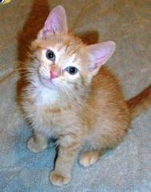

In [4]:
img = PILImage.create(image_cat())
img.to_thumb(192)


In [ ]:
uploader = widgets.FileUpload()
uploader

In [5]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [6]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [7]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.129034,2.568120,00:02


epoch,train_loss,valid_loss,time
0,1.981353,1.649808,00:02
1,1.704608,1.445737,00:02
2,1.512936,1.218589,00:02
3,1.368767,0.952836,00:02
4,1.222512,0.853055,00:02
5,1.104533,0.743187,00:02
6,1.004938,0.720602,00:02
7,0.928366,0.702040,00:02


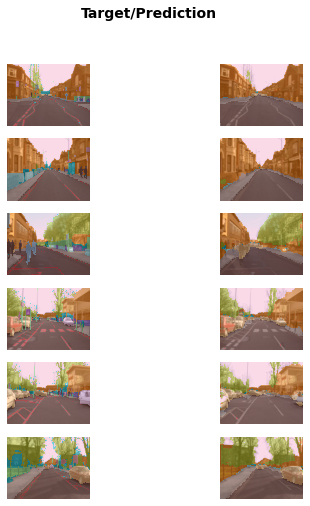

In [8]:
learn.show_results(max_n=6, figsize=(7,8))

In [9]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.458627,0.402478,0.820240,02:43


epoch,train_loss,valid_loss,accuracy,time
0,0.305080,0.241588,0.903160,05:15
1,0.245689,0.212365,0.918880,05:15
2,0.190460,0.184173,0.928840,05:15
3,0.150889,0.189474,0.930320,05:15


In [10]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([2.5501e-04, 9.9974e-01]))

In [11]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [12]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.371330,0.363359,0.832770,00:05
1,0.362690,0.350529,0.836916,00:05
2,0.350352,0.344645,0.838759,00:05


In [13]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.502626,1.436104,00:00


epoch,train_loss,valid_loss,time
0,1.354461,1.375152,00:00
1,1.248513,1.186878,00:00
2,1.005707,0.874296,00:00
3,0.795088,0.737238,00:00
4,0.682730,0.704470,00:00
5,0.642642,0.695310,00:00
6,0.620968,0.690554,00:00
7,0.615781,0.689420,00:00
8,0.602483,0.688677,00:00
9,0.611634,0.688576,00:00


In [14]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,19.0,26.0,4.5,4.054209
1,8.0,90.0,3.0,4.375954
2,81.0,2.0,3.5,3.326896
3,48.0,25.0,2.0,3.777259
4,83.0,67.0,4.0,3.927464
5,33.0,97.0,4.0,3.907926
6,27.0,9.0,4.0,3.546902
7,45.0,38.0,2.0,3.315236
8,38.0,7.0,5.0,4.670257
